In [1]:
from arty import core, filter, nn
from matplotlib import pyplot as plt
from os import listdir
import cv2

plt.rcParams["figure.figsize"] = (20, 20)

In [3]:
def showInRow(list_of_images, titles=None, disable_ticks=False):
    count = len(list_of_images)
    for idx in range(count):
        subplot = plt.subplot(1, count, idx + 1)
        if titles is not None:
            subplot.set_title(titles[idx])

        img = list_of_images[idx]
        cmap = 'gray' if (len(img.shape) == 2 or img.shape[2] == 1) else None
        subplot.imshow(img, cmap=cmap)
        if disable_ticks:
            plt.xticks([]), plt.yticks([])
    plt.show()

In [4]:
images = [cv2.cvtColor(cv2.imread(f'images/{i}'), cv2.COLOR_BGR2RGB) for i in listdir('images')]

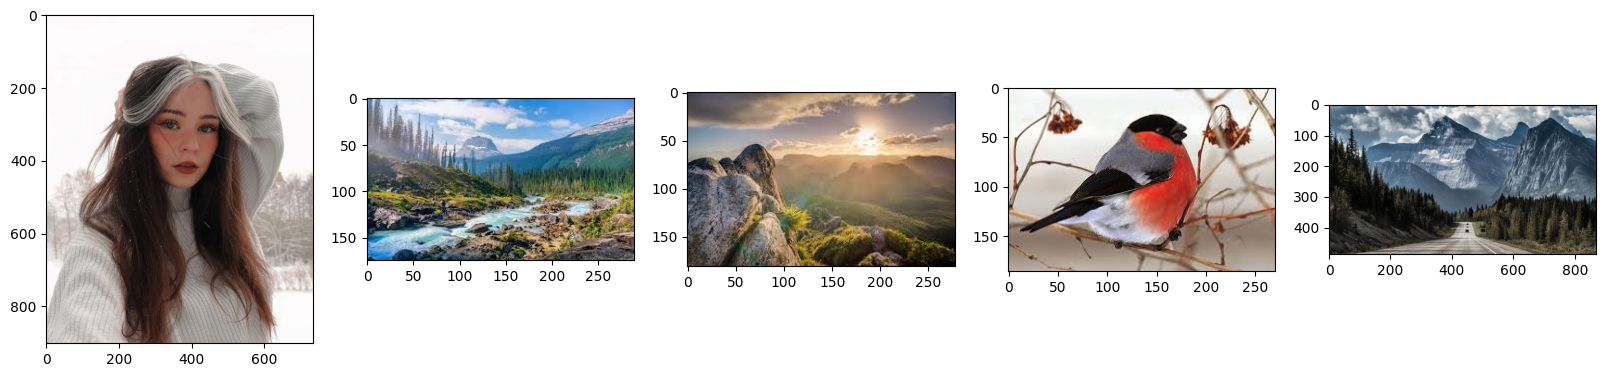

In [4]:
showInRow(images)

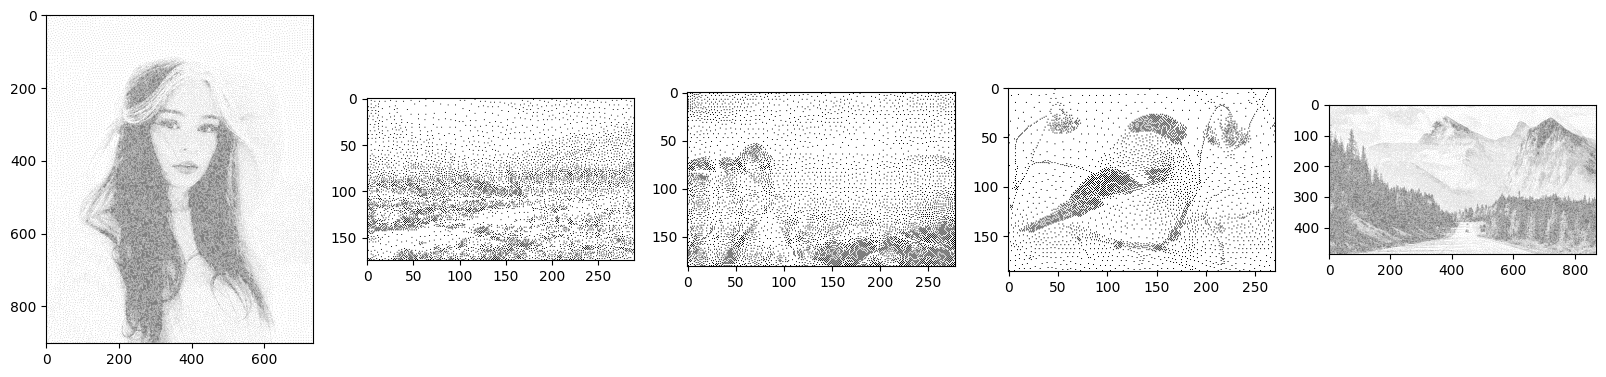

In [5]:
point_filter = filter.Points()
points = []
for img in images:
    points.append(point_filter.process(img))
showInRow(points)

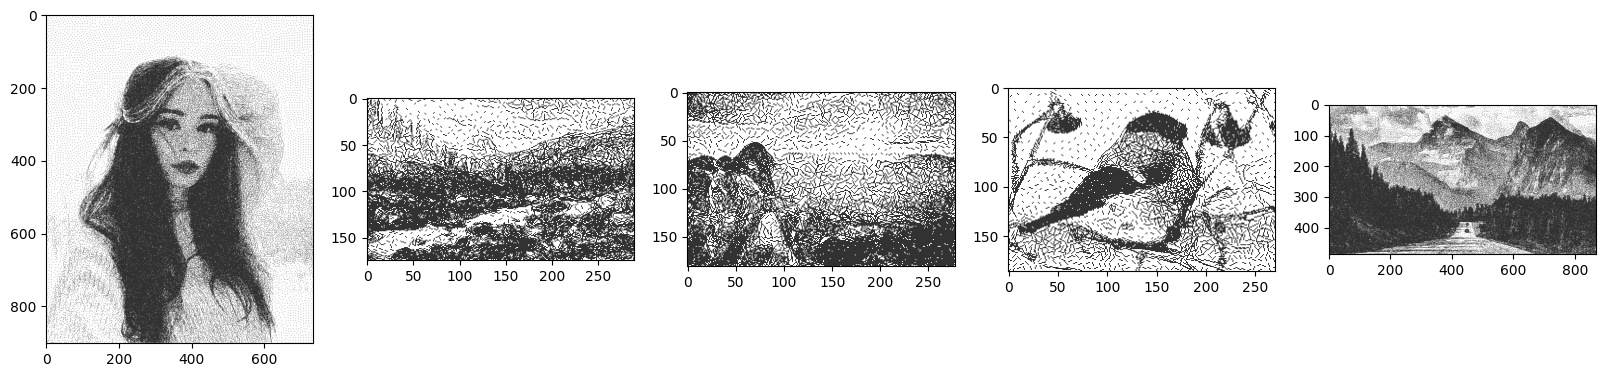

In [6]:
stroke_filter = filter.Strokes()
strokes = []
for img in images:
    strokes.append(stroke_filter.process(img))
showInRow(strokes)

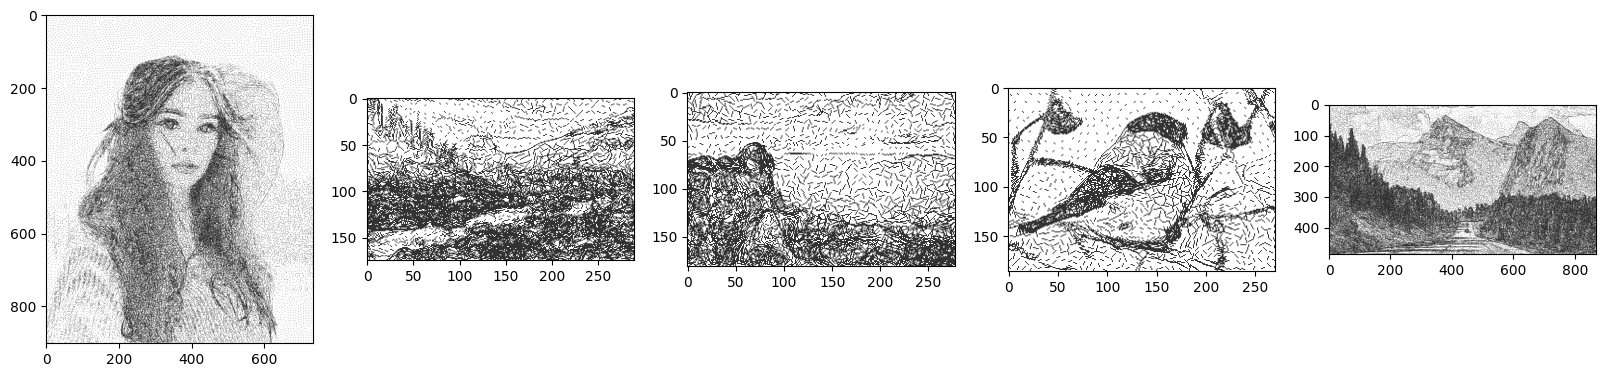

In [10]:
point_filter = filter.Points(gradient_scaler=2, darkness_scaler=-1)
stroke_filter = filter.Strokes()
strokes = []
for img in images:
    points = point_filter.process(img)
    strokes.append(stroke_filter.process(img, points=points))
showInRow(strokes)

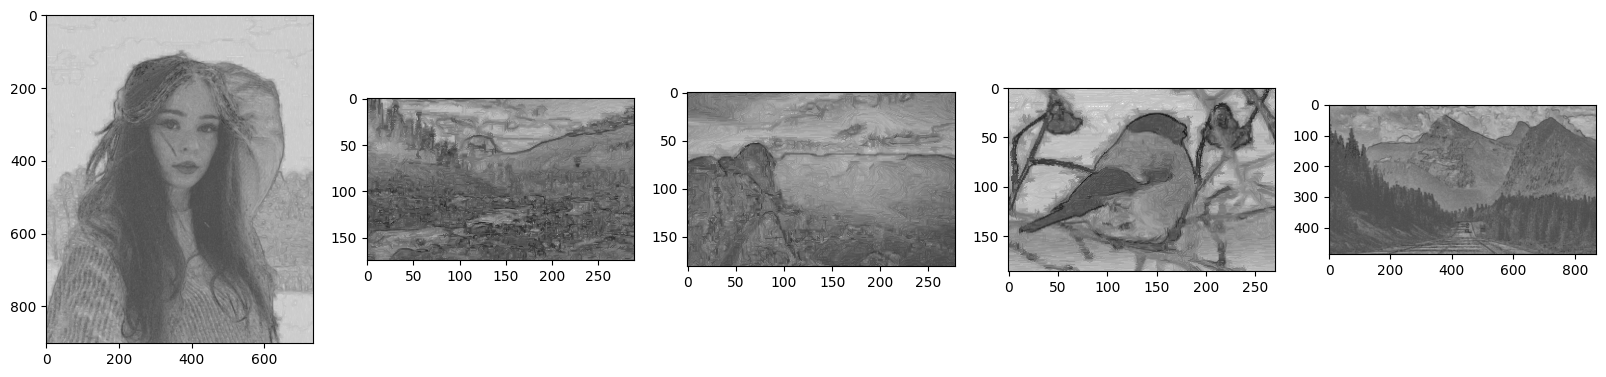

In [11]:
pencil_filter = filter.Pencil()
pencil = []
for img in images:
    pencil.append(pencil_filter.process(img))
showInRow(pencil)

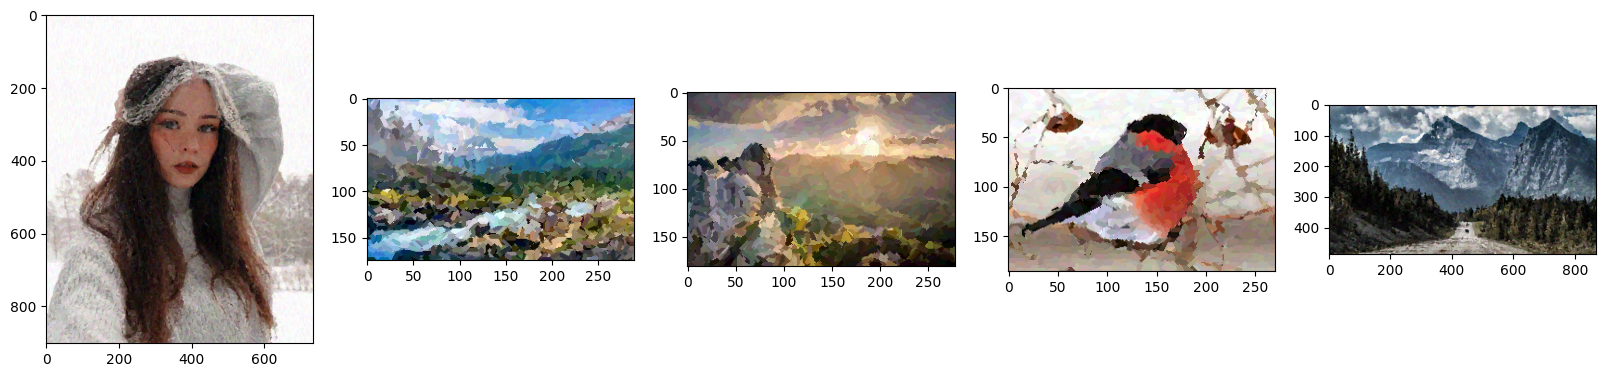

In [13]:
line_filter = filter.Lines()
lines = []
for img in images:
    lines.append(line_filter.process(img))
showInRow(lines)

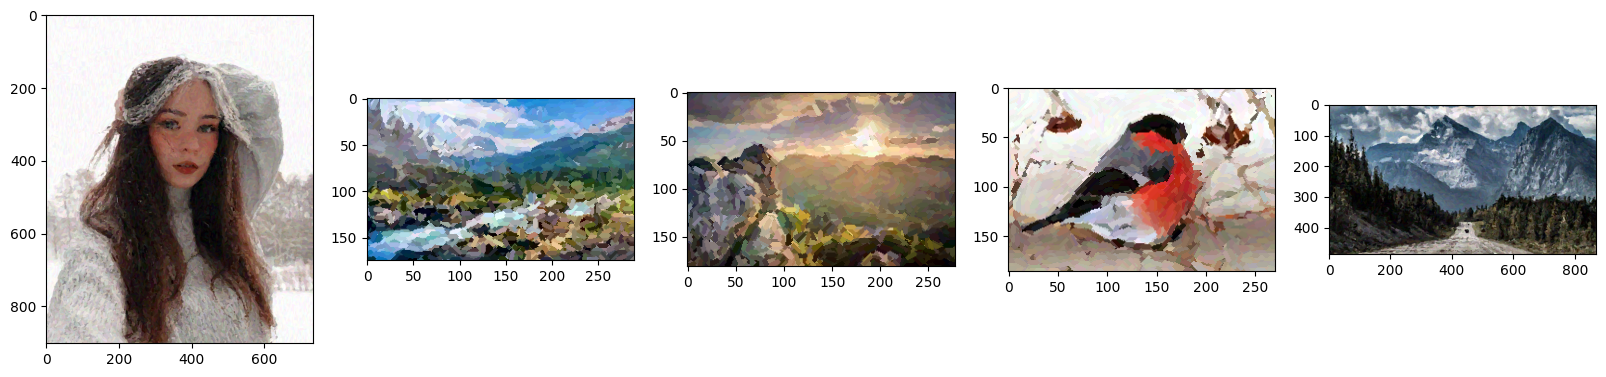

In [14]:
angle_predictor = core.angle.Conditional()
line_filter = filter.Lines()
lines = []
for img in images:
    angles = angle_predictor.predict(img)
    lines.append(line_filter.process(img, angles=angles))
showInRow(lines)

training...
drawing...


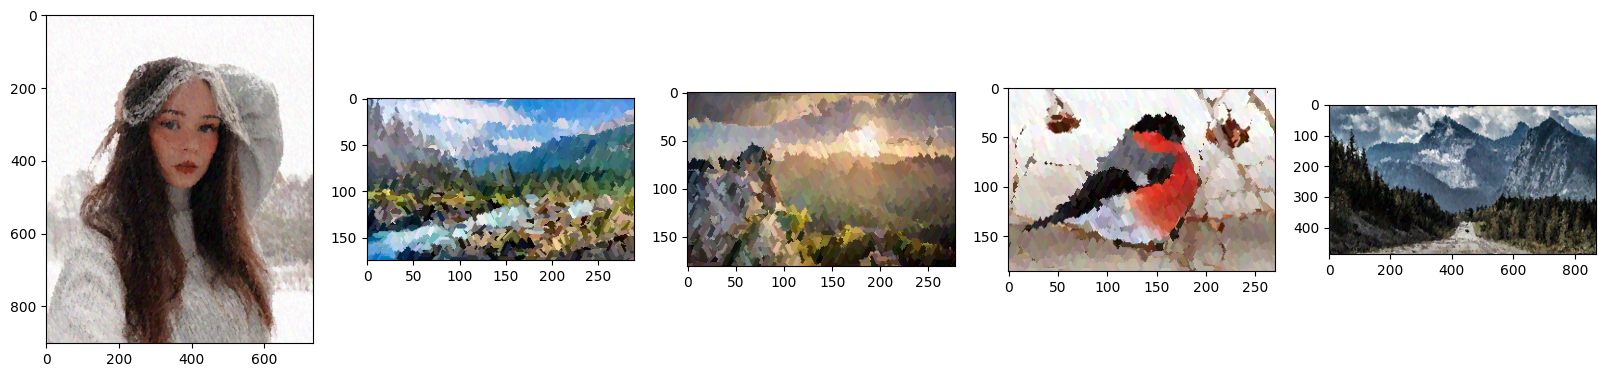

In [6]:
angle_predictor = nn.CNN()
print('training...')
angle_predictor.fit()
print('drawing...')
line_filter = filter.Lines()
lines = []
for img in images:
    angles = angle_predictor.predict(img)
    lines.append(line_filter.process(img, angles=angles))
showInRow(lines)